## Supervised Learning
## Project: Finding Donors for *CharityML*

## Overview

In this project, I will use several supervised algorithms to accurately model individual income using data collected from the 1994 US Census. I will then select the best candidate algorithm from the preliminary results and further optimize this algorithm for the best possible data modeling. My goal with this implementation is to build a model that accurately predicts if a person makes more than $50,000.
The data set for this project comes from the UCI machine learning repository.

## Exploring the Data

###  Load the data

In [1]:
# Import libraries necessary for this project and read the data
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import visuals as vs
%matplotlib inline
data = pd.read_csv("census.csv")
display(data.head(n=3))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [3]:
#Total number of records
n_records =data.shape[0]
#Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]
#Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]
#Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records * 100
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


### 2. The features list

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Preparing the Data

### Transforming Skewed Continuous Features

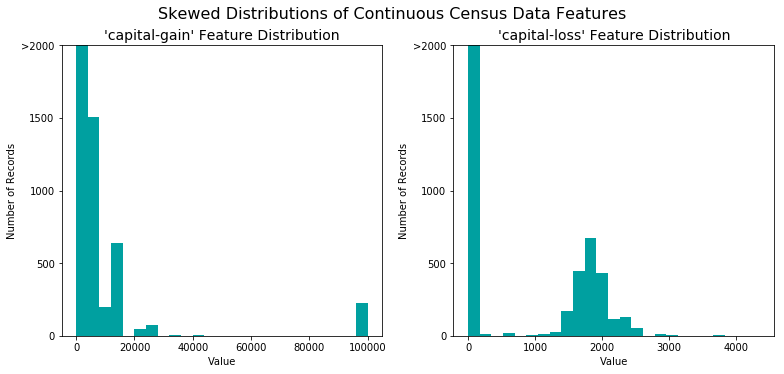

In [4]:
# Splitting the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualizing skewed continuous features of original data
vs.distribution(data)

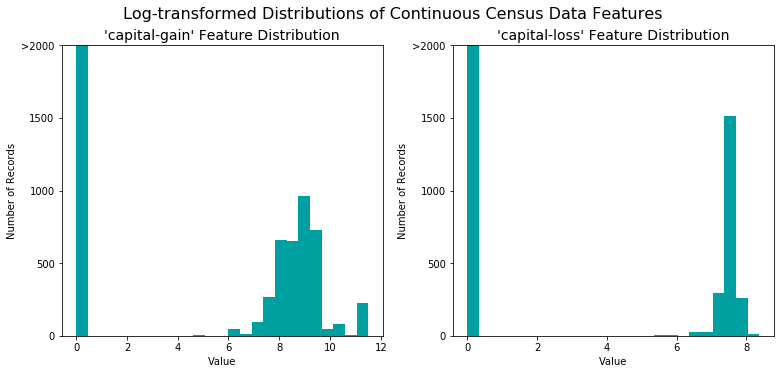

In [5]:
# Log-transforming the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualizing the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initializing a scaler and apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Data Preprocessing

In [7]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
# get all non numerical column list:
cat_cols = features_log_minmax_transform.select_dtypes(include='object').columns
cat_cols

Index(['workclass', 'education_level', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [8]:
features_final = pd.get_dummies(features_log_minmax_transform, columns=cat_cols)

# Encoding the 'income_raw' data to numerical values
income = income_raw.map({'<=50K': 0, '>50K': 1})

# Printing the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


### Shuffle and Split Data

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## Evaluating Model Performance

### Naive Predictor Performace

In [11]:
# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
TP = np.sum(income) #we have 1 if income > 50000
FP = income.count() - TP # Specific to the naive case
TP

11208

In [12]:
FP = income.count() - TP
FP


34014

In [13]:
TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

In [14]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
accuracy

0.24784396974923709

In [15]:
recall = TP / (TP + FN)
recall

1.0

In [16]:
precision = TP / (TP + FP)
precision

0.24784396974923709

In [17]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
b = 0.5
fscore = (1 + b**2) * (precision * recall)/(b**2 * precision + recall)

print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models


### Model Application
For this project  I chose Gradient Boosting, AdaBoost and Logistic Regression.

**Gradient Boosting**
* Strengths: It has a high tolerance to the missing data (imputations are not required) and often the best predictive accuracy.
* Weaknesses: It has a relatively long training time and tends to overfit with small data samples quantity.
* Candidacy: We have enough data, don't have short train time requirements, and need good accuracy.
* Real-world: As an example, the research describes the usage of Gradient Boosting for credit scoring: https://www.sciencedirect.com/science/article/pii/S1877050920315842. Also, I see using it for sentiment analysis in languages: https://www.mdpi.com/1999-4893/10/1/34/htm. As we can see, both areas require the best possible accuracy without high real-time requirements.

**AdaBoost**
* Strengths: It is a robust classification algorithm with high adaptability. It is not easy to overfit as other classification algorithms.
* Weaknesses: It's not suitable for noisy data with outliers.
* Candidacy: Our data is not too noisy, and we have a lot of features.
* Real-world: It's a widely used algorithm for face recognition: https://benthamopen.com/contents/pdf/TOCSJ/TOCSJ-8-183.pdf

**Logistic Regression**
* Strengths: It is a simple, "classical" algorithm. It has minimal training and prediction time and a low tendency to overfit. It works well for binary classification problems.
* Weaknesses: It usually has worse accuracy than the most advanced algorithms. It has linear boundaries, so it works worse in case of a high quantity of features.
* Candidacy: We have a binary classification problem.
* Real-world: It is widely used in the case of binary classification problems.

### Creating a Training and Predicting Pipeline

In [18]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculating the training time
    results['train_time'] = end - start
        
    # Getting the predictions on the test set(X_test)
    
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculating the total prediction time
    results['pred_time'] = end - start
            
    # Computing accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Computing accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Computing F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,  beta=0.5)
        
    # Computing F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    return results

### Initial Model Evaluation

GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


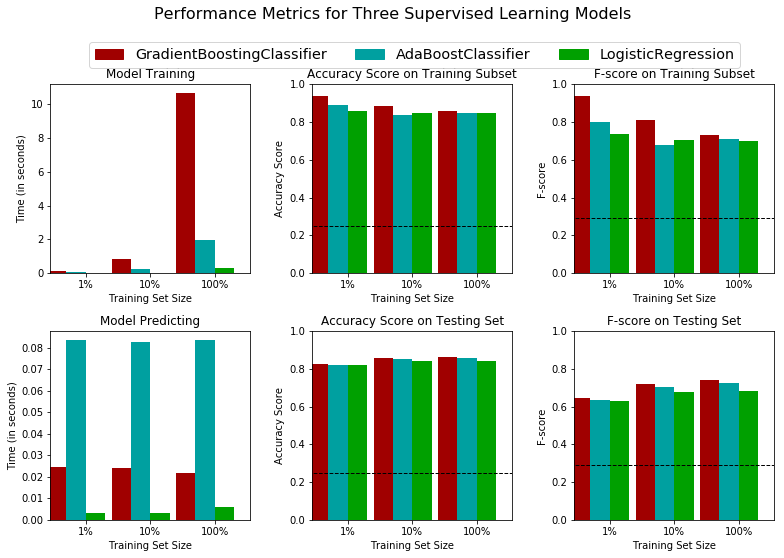

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

clf_A = KNeighborsClassifier()
clf_B = AdaBoostClassifier(random_state=17)
clf_C = LogisticRegression(random_state=17)
clf_D = RandomForestClassifier(random_state=17)
clf_E = tree.DecisionTreeClassifier(random_state=17)
clf_F = svm.SVC(random_state=17)
clf_G = GaussianNB()
clf_H = GradientBoostingClassifier(random_state=17)
clf_I = SGDClassifier(random_state = 17)

#cl_list = [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G, clf_H, clf_I]
#cl_list = [clf_F, clf_G, clf_H, clf_I]
cl_list = [clf_H, clf_B, clf_C]


samples_100 = X_train.shape[0]
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in cl_list:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)


## Improving Results

### Choosing the Best Model
The best model of the three models for this data is the Gradient Boosting Classifier. Although it has more than 20 seconds of training time, it's still acceptable for such applications. It's doesn't matter how much time to train: 20 seconds or 20 minutes, because this application is not sensitive to the training time. The Gradient Boosting Classifier has the best F score and accuracy on the test set, which means that the model has good results both in terms of recall and accuracy, which in turn are the main requirements for such non-real-time applications. The relatively short prediction time is a little bonus



### Describing the Model 

* Gradient Boosting Classifier works by combining small, simple models (in this case, they are decision trees) to create an ensemble of models that can predict whether an individual earns above 50k or not. Each model uses features of people (for example, education, marital status, etc.) to create a set of rules that can predict a person's classification by income.
* The training process includes decimating bad small models and promoting good small models. This process is repeated. 
We have a complex model with many small, simple models at the end of the successful training process. Every survived small model has its weight within the complex model.
* When we give the actual data to the final trained complex model, those mentioned above small best models are voting "is this person earning more than $50k?" using their weight. If the sum of votes is more than fifty percent, the final model answers "YES."

### Model Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, r2_score

clf = GradientBoostingClassifier(random_state=17)

# Creation of the parameters list you wish to tune, using a dictionary if needed.

parameters = {'n_estimators': [10, 30, 100], 'learning_rate': [0.1, 0.35, 1.1] }

# fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

# Making predictions using the unoptimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8703
Final F-score on the testing data: 0.7524


In [21]:
print (grid_fit.best_params_)

{'learning_rate': 0.35, 'n_estimators': 100}


### Final Model Evaluation


#### Results:


|     Metric     | Naive predictor  |Unoptimized Model | Optimized Model |
| :------------: |:---------------: |:---------------: | :-------------: | 
| Accuracy Score |  0.2478          |    0.8630        |  0.8703         |
| F-score        |  0.2917          |    0.7395        |  0.7524         |



The scores of the optimized model are slightly better than those of the non-optimized one.
F-Score increased by 0.4607, and Accuracy increased by 0.6225 compared to the naive predictor benchmark.

## Feature Importance

### Feature Relevance Observation 

I expect that the most important features are: education-num, hours-per-week, occupation, capital-gain, and capital-loss 
1. education-num : I think it's an essential feature because if a person has a better education, they will earn more money; Also, I believe it is crucial because it's a numerical feature.
2. hours-per-week: Jobless entities, even with good education, are more likely to have less money than somebody working 24/7
3. ,4. capital-gain and capital-gain: Whoever has extra money is likely to have more than 50,000. The opposite for capital loss
5. The same thing as education, the occupation significantly impacts earning money. 

### Implementation - Extracting Feature Importance

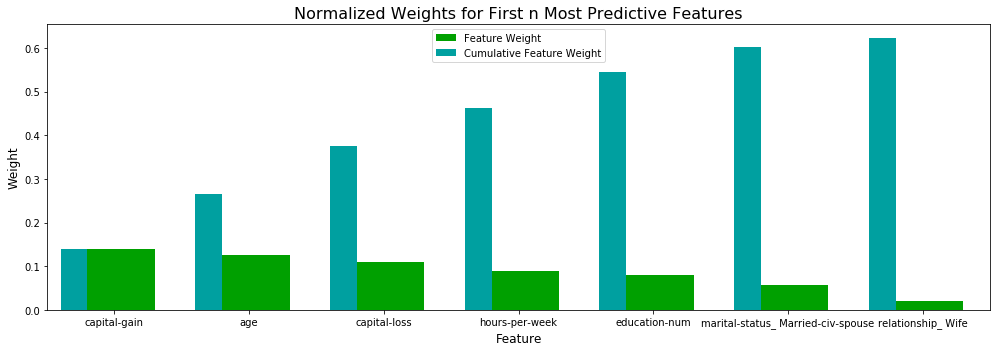

In [22]:
# Training the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=17,n_estimators=100, learning_rate=.35).fit(X_train, y_train)

# Extracting the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train, 7)

### Extracting Feature Importance

Of the five features listed above (capital-gain, age, capital-loss hours-per-week, educational-num), four of these were the same as mine (capital-gain, capital-loss, hours-per-week, educational-num). 
It correlates with my thoughts that education is one dimension, work longevity is another dimension of the "yearly income equation." Still, I missed age, another size in the above equation! The age gives experience, which increases the chances to earn more. 
Each of these features multiplicates another two. 
Capital gain and Capital loss are additional features to the above equation. 

### Feature Selection

In [23]:
n = 5 #number of features
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:n]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:n]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8703
F-score on testing data: 0.7524

Final Model trained on reduced data
------
Accuracy on testing data: 0.8416
F-score on testing data: 0.6959
F-score on testing data: 0.6959


###  Effects of Feature Selection

* Initially, using only five features, I got a significant drop for F-score: around 6% and some reduction for accuracy: 3%. Because of this, I decided to dive into feature importance a little more: I added the parameter n to the feature_plot function and checked the significance of the first seven features. Using the above info, I have seen that the best strategy is to increase n to 6. The results are more acceptable with six features: F score is lower only by 2% and accuracy 1%. In case, when we are forced to use only 5 features, the performance of the model is not acceptable.
* If the training time is a factor, I will first consider another algorithm and then reduce the feature quantity. Moreover, fewer features mean less need for data for training, so maybe in such a case, I will consider decreasing training set data.
